## Problem Definition

###### Given a farely great amount of data about bulldozers (features and their sales price), is it possible to predict the sale - price of a bulldozer using a linear - regression machine learning model?

### Data
###### The data used in this project comes from [kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

###### The data was part of a [kaggle - competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview) which aim was to find a suitable model to predict the prices of bulldozers.

###### The data is split into three different sets:

###### Train.csv

* is the training set, which contains data through the end of 2011.
  Valid.csv

###### Valid.csv

* is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set.
  Test.csv

###### Test.csv

* is the test set. It contains data from May 1, 2012 - November 2012.
  Evaluation
  The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted         auction prices.

-> [source](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation)

Features
There are 52 different features in the data sets. Those are described in detail in the data-dictionary in this project. For more information about the features check: [Features](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

###### Importing modules and model - classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import seaborn as sns
import scipy

In [2]:
from sklearn.linear_model import SGDClassifier, Lasso, Ridge
from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Import data

In [44]:
#Import training and validation data to explore the data-set
df = pd.read_csv("../data/training_data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort data after TimerSeries data

In [45]:
#Sort the DataFrame after the TimeSeries Data
df.sort_values(by=["saledate"], inplace=True) 

In [46]:
#check changes(should be chronologically)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


###### Another thing we might do is split the datetime column into year and month.

In [47]:
#Create Month and year column for the sales
df["Sale-Month"] = df["saledate"].dt.month
df["Sale-Year"] = df["saledate"].dt.year
df.drop("saledate", axis=1, inplace=True)

##### Let's now visualize the distribution of some important random variables.

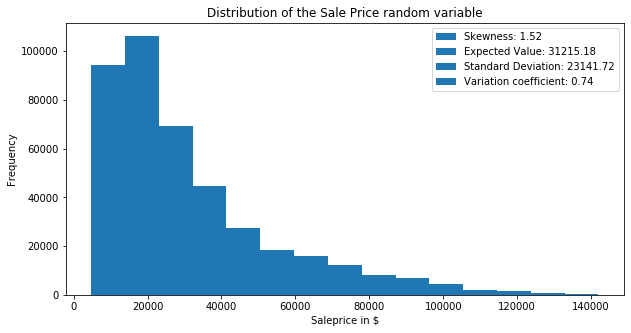

In [48]:
fig, ax = plt.subplots(figsize=(10,5),
                       nrows=1,
                       ncols=1)

#Patching some important information
skewness = round(scipy.stats.skew(df["SalePrice"]),2)
skewness_patch=mpatches.Patch(label="Skewness: "+str(skewness))

expected_value=round(np.mean(df["SalePrice"]),2)
expected_value_patch=mpatches.Patch(label="Expected Value: "+str(expected_value))

std_deviation=round(np.std(df["SalePrice"]),2)
std_deviation_patch=mpatches.Patch(label="Standard Deviation: "+str(std_deviation))

variation_coefficient=round(scipy.stats.variation(df["SalePrice"]),2)
variation_coefficient_patch=mpatches.Patch(label="Variation coefficient: "+str(variation_coefficient))

#Plotting the legend
plt.legend(handles=[skewness_patch, expected_value_patch, std_deviation_patch, variation_coefficient_patch])

#Plotting histogram
ax.hist(df["SalePrice"], bins=15)

#Set meta-information
ax.set(title="Distribution of the Sale Price random variable",
       xlabel="Saleprice in $",
       ylabel="Frequency");

plt.show()

As the skewness - value indicates, the Distribution of the SalePrice - random variable is very right skewed. 

The majority of the data is therefore in the left side of the distribution with the majority of the data within the range of ~[5000,40000]

###### Let's take a look at the sale-numbers over the years

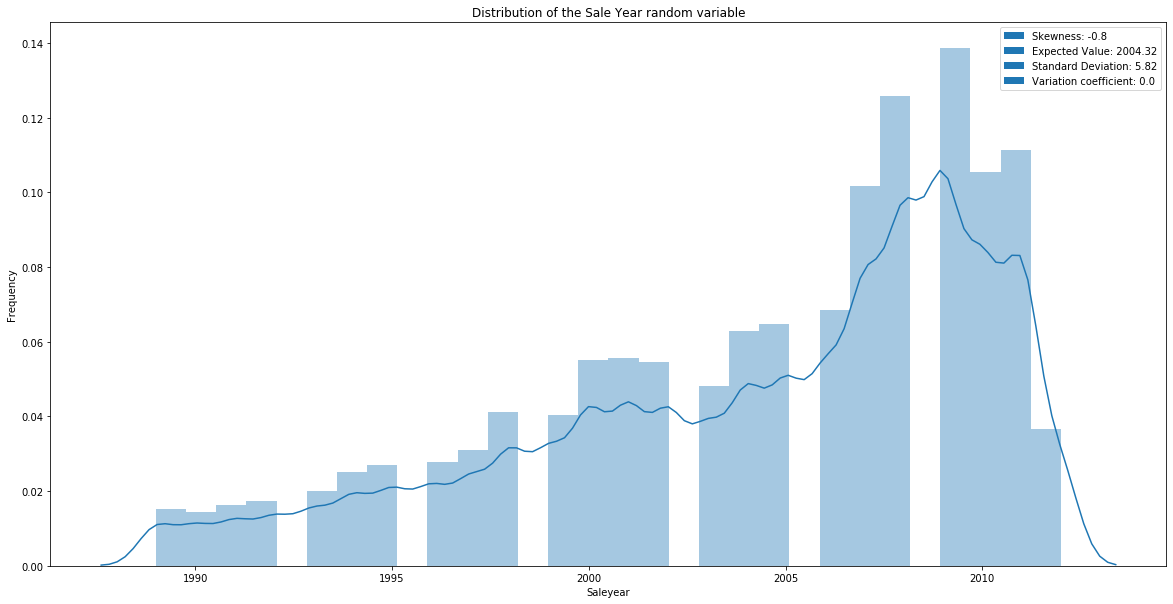

In [49]:
fig, ax = plt.subplots(figsize=(20,10),
                       nrows=1,
                       ncols=1)

#Patching some important information
skewness = round(scipy.stats.skew(df["Sale-Year"]),2)
skewness_patch=mpatches.Patch(label="Skewness: "+str(skewness))

expected_value=round(np.mean(df["Sale-Year"]),2)
expected_value_patch=mpatches.Patch(label="Expected Value: "+str(expected_value))

std_deviation=round(np.std(df["Sale-Year"]),2)
std_deviation_patch=mpatches.Patch(label="Standard Deviation: "+str(std_deviation))

variation_coefficient=round(scipy.stats.variation(df["Sale-Year"]),2)
variation_coefficient_patch=mpatches.Patch(label="Variation coefficient: "+str(variation_coefficient))

#Plotting the legend
plt.legend(handles=[skewness_patch, expected_value_patch, std_deviation_patch, variation_coefficient_patch])

#Plotting histogram
sns.distplot(df["Sale-Year"], bins=30)

#Set meta-information
ax.set(title="Distribution of the Sale Year random variable",
       xlabel="Saleyear",
       ylabel="Frequency");

plt.show()

###### The monthly salerate should be interesting.

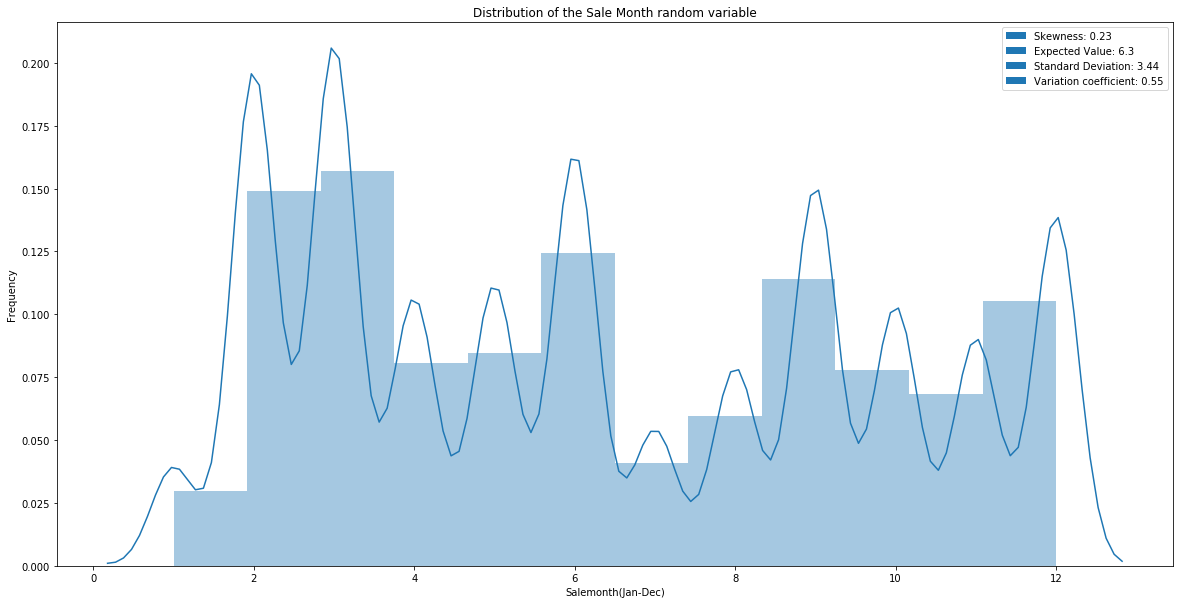

In [50]:
fig, ax = plt.subplots(figsize=(20,10),
                       nrows=1,
                       ncols=1)

#Patching some important information
skewness = round(scipy.stats.skew(df["Sale-Month"]),2)
skewness_patch=mpatches.Patch(label="Skewness: "+str(skewness))

expected_value=round(np.mean(df["Sale-Month"]),2)
expected_value_patch=mpatches.Patch(label="Expected Value: "+str(expected_value))

std_deviation=round(np.std(df["Sale-Month"]),2)
std_deviation_patch=mpatches.Patch(label="Standard Deviation: "+str(std_deviation))

variation_coefficient=round(scipy.stats.variation(df["Sale-Month"]),2)
variation_coefficient_patch=mpatches.Patch(label="Variation coefficient: "+str(variation_coefficient))

#Plotting the legend
plt.legend(handles=[skewness_patch, expected_value_patch, std_deviation_patch, variation_coefficient_patch])

#Plotting histogram
sns.distplot(df["Sale-Month"], bins=12)

#Set meta-information
ax.set(title="Distribution of the Sale Month random variable",
       xlabel="Salemonth(Jan-Dec)",
       ylabel="Frequency");

plt.show()

As the skewness rate indicates, the most bulldozers are sold in the first half of the year, although the expected value of a bulldozer sold lies in June(6.3)

Let's now take a look at the Distribution of manufacturing year

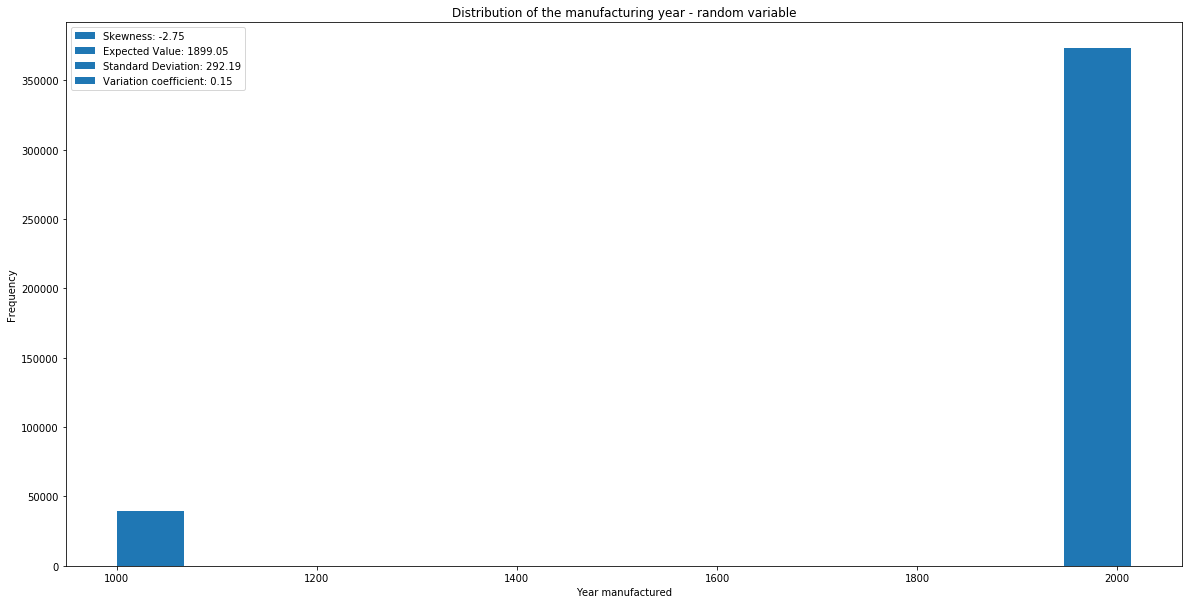

In [51]:
fig, ax = plt.subplots(figsize=(20,10),
                       nrows=1,
                       ncols=1)

#Patching some important information
skewness = round(scipy.stats.skew(df["YearMade"]),2)
skewness_patch=mpatches.Patch(label="Skewness: "+str(skewness))

expected_value=round(np.mean(df["YearMade"]),2)
expected_value_patch=mpatches.Patch(label="Expected Value: "+str(expected_value))

std_deviation=round(np.std(df["YearMade"]),2)
std_deviation_patch=mpatches.Patch(label="Standard Deviation: "+str(std_deviation))

variation_coefficient=round(scipy.stats.variation(df["YearMade"]),2)
variation_coefficient_patch=mpatches.Patch(label="Variation coefficient: "+str(variation_coefficient))

#Plotting the legend
plt.legend(handles=[skewness_patch, expected_value_patch, std_deviation_patch, variation_coefficient_patch])

#Plotting histogram
ax.hist(df["YearMade"], bins=15)

#Set meta-information
ax.set(title="Distribution of the manufacturing year - random variable",
       xlabel="Year manufactured",
       ylabel="Frequency");

plt.show()

In [52]:
#let's check the distribution of the exact values of the manufacturing year
df["YearMade"].value_counts().sort_index()

1000    39391
1919      127
1920       17
1937        1
1942        1
        ...  
2010       58
2011       31
2012        1
2013        1
2014        2
Name: YearMade, Length: 73, dtype: int64

###### According to the above values, all values with year 1000 should be transformed into useful data. Let's take a look at the distribution without the error data.

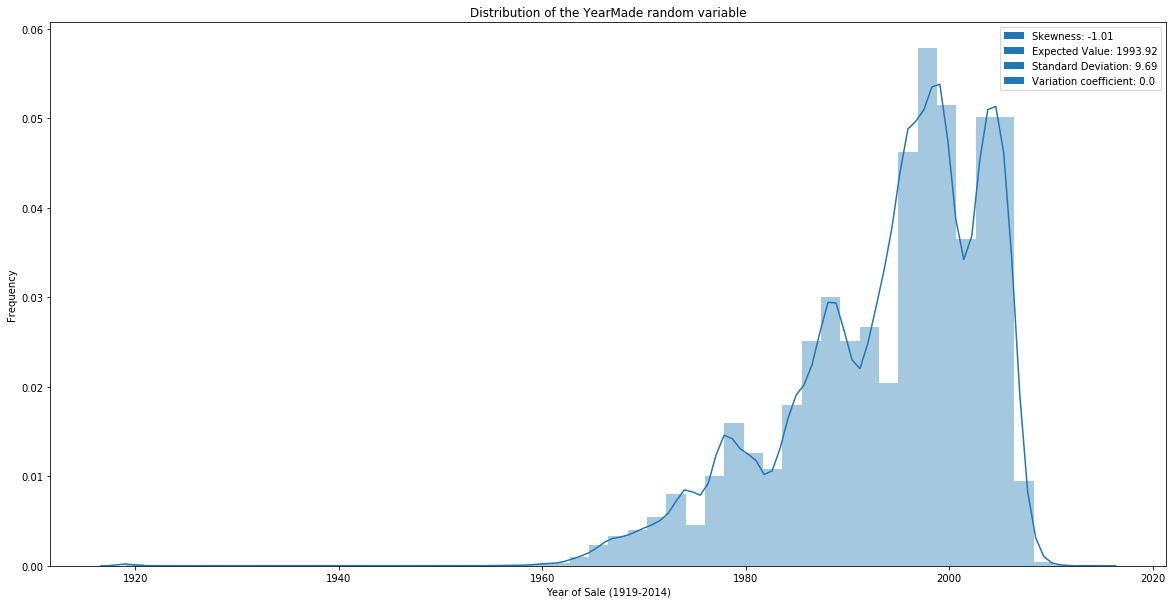

In [53]:
fig, ax = plt.subplots(figsize=(20,10),
                       nrows=1,
                       ncols=1)

df_year = df[df["YearMade"] != 1000]["YearMade"]

#Patching some important information
skewness = round(scipy.stats.skew(df_year),2)
skewness_patch=mpatches.Patch(label="Skewness: "+str(skewness))

expected_value=round(np.mean(df_year),2)
expected_value_patch=mpatches.Patch(label="Expected Value: "+str(expected_value))

std_deviation=round(np.std(df_year),2)
std_deviation_patch=mpatches.Patch(label="Standard Deviation: "+str(std_deviation))

variation_coefficient=round(scipy.stats.variation(df_year),2)
variation_coefficient_patch=mpatches.Patch(label="Variation coefficient: "+str(variation_coefficient))

#Plotting the legend
plt.legend(handles=[skewness_patch, expected_value_patch, std_deviation_patch, variation_coefficient_patch])

sns.distplot(df[df["YearMade"] != 1000]["YearMade"]);

#Set meta-information
ax.set(title="Distribution of the YearMade random variable",
       xlabel="Year of Sale (1919-2014)",
       ylabel="Frequency");

plt.show();

So as we can observe there are obviously some invalid data, which we have to fix. Let's now take a look at the "NaN" - values to get an overview of the data we have to fix or exclude. First we should look at the important random variables/features that correlate to a certain degree with the target random variable and also drop some features that are not important.

The Identifier Features for database storing are not needed as they do not provide useful information.

In [54]:
df.drop(["SalesID","MachineID","ModelID","datasource","auctioneerID"], axis=1, inplace=True)

### Make copy of current dataframe

In [55]:
df_temp = df.copy()
df_temp.to_csv("intermediate_df_train.csv")
df_temp = pd.read_csv("intermediate_df_train.csv")

C:\Users\Rico\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###### Now we have to convert non-numeric type(in this case strings) variables into categorical. First we got to find all the variables that contain non-numeric values.

In [56]:
#find all non-numeric random-variables.
non_numeric_random_variables = [variable for variable in df_temp.columns if df_temp[variable].dtype == "object"]
non_numeric_random_variables

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [57]:
#Changing object-variables to categorical variables
for variable in non_numeric_random_variables:
    df_temp[variable] = pd.Categorical(df[variable])

###### So now there are no object - variables left.

##### Now we want to fill the missing data with reasonable data. We'll look at the distribution of the numerical variables to find a good estimator for the missing values.

### Feature engineering

Before modelling a Regresson: 
* NA - values have to imputed


In [58]:
#get all numerical variables with missing values
def findNumericFeaturesWithNA(dataframe):
    """
    returns a list of all numerical features(int64 or float64) that contain at least one NaN - value.
    """
    #for int64
    na_numerical_variables_1 = [variable for variable in df_temp.columns if df_temp[variable].dtype == "int64" and df_temp[variable].isna().sum() > 0]
    #for float64
    na_numerical_variables_2 = [variable for variable in df_temp.columns if df_temp[variable].dtype == "float64" and df_temp[variable].isna().sum() > 0]

    return na_numerical_variables_1 + na_numerical_variables_2

In [59]:
na_numerical_variables = findNumericFeaturesWithNA(df_temp)
na_numerical_variables

['MachineHoursCurrentMeter']

##### As we can see there are many 0-values in MachineHoursCurrentMeter. According to the Feature-Dictionary 0-values meen that no hours have been reported for that sale, so the 0-values are also going to get the median - value. Before they will be replaced with NaN, as no value was recorded. But before I can do that I have to split the dataset into train and validation set, where the validation set contains all the data with the saleyear of 2012, otherwise data of the validation set would land in the training dataset.

In [60]:
df_temp_train = df_temp[df_temp["Sale-Year"] != 2012]
df_temp_valid = df_temp[df_temp["Sale-Year"] == 2012]

In [61]:
#take a look if the dataframe ends with the year 2011
df_temp_train.tail()

,Unnamed: 0,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year
401120,393098,29000.0,1000,NaN,NaN,IT28B,IT28,B,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,12,2011
401121,400217,11000.0,2005,NaN,NaN,T190,T190,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2011
401122,400302,11000.0,2005,NaN,NaN,T190,T190,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2011
401123,400393,18000.0,2004,NaN,NaN,LB75,LB75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2011
401124,393123,13500.0,1000,NaN,NaN,D4C,D4,C,NaN,NaN,...,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,12,2011


In [62]:
#take a look if the dataframe starts with the year 2012
df_temp_valid.head()

,Unnamed: 0,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year
401125,405675,46173.2,1996,0.0,NaN,D65E12,D65,E,12,NaN,...,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,1,2012
401126,401133,66000.0,1000,8145.0,Low,12HNA,12,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2012
401127,406076,26800.0,2000,24.0,Low,590SUPER LII,590,SUPER L,II,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2012
401128,409018,42100.0,2004,4373.0,Medium,120C,120,C,NaN,NaN,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,2012
401129,409026,62100.0,2006,3467.0,Medium,160CLC,160,C,NaN,LC,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,2012


###### Before we fill the missing values we got to get rid of the extreme outlier - error values in the MachineHoursCurrentMeter -variable like seen below

In [63]:
df_temp["MachineHoursCurrentMeter"].value_counts().sort_index()

0.0          73834
1.0              2
2.0             18
3.0             21
4.0             35
             ...  
1728600.0        1
1729600.0        1
1857100.0        1
2202400.0        1
2483300.0        1
Name: MachineHoursCurrentMeter, Length: 15633, dtype: int64

In [64]:
df_temp[df_temp["MachineHoursCurrentMeter"] > 1000000]

,Unnamed: 0,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year
298566,330979,19000.0,1994,1189500.0,High,644G,644,G,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,3,2009
302184,347409,12000.0,1996,2202400.0,High,PC300LC5,PC300,NaN,LC,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2009
302304,297550,22000.0,1995,1729600.0,High,350L,350,NaN,NaN,L,...,None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN,3,2009
302342,305333,40000.0,1999,1282700.0,High,330BL,330,B,NaN,L,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,2009
302475,309643,27000.0,1992,1728600.0,High,950F,950,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,3,2009
302499,328328,31000.0,2001,1148500.0,High,330LC,330,NaN,NaN,LC,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,2009
302501,328327,22000.0,2001,1209500.0,High,370,370,NaN,NaN,NaN,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,2009
302522,309549,80000.0,1998,1711700.0,High,D8RLRC,D8,R,NaN,LRC,...,NaN,NaN,NaN,None or Unspecified,Semi U,Differential Steer,NaN,NaN,3,2009
302563,328336,17000.0,2001,1203000.0,High,370,370,NaN,NaN,NaN,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,3,2009
303089,294077,32250.0,1998,1098000.0,High,938F,938,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,3,2009


###### As values above around 1000000 are outliers, so we're gonna exclude them. For TRAINING SET

In [65]:
#first replace all zeros with NaN as they represent the same
df_temp_train["MachineHoursCurrentMeter"] = df_temp_train["MachineHoursCurrentMeter"].replace(value=0.0, to_replace=np.NaN)
#exclude values that are greater than 1000000 for the MachineHoursCurrentMeter
df_temp_train = df_temp_train[df_temp_train["MachineHoursCurrentMeter"] <= 1000000]
df_temp_train[df_temp_train["MachineHoursCurrentMeter"] > 1000000]

C:\Users\Rico\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year


###### Fill the missing values with the median in the TRAINING SET

In [66]:
#convert the zeros to NaN back to be able to fill them with the median
df_temp_train["MachineHoursCurrentMeter"] = df_temp_train["MachineHoursCurrentMeter"].replace(value=np.NaN, to_replace=0.0)
#fill the NaN - values with the median
df_temp_train["MachineHoursCurrentMeter"] = df_temp_train["MachineHoursCurrentMeter"].fillna(df_temp_train["MachineHoursCurrentMeter"].median())

In [67]:
#Drop byproduct column
df_temp_train.drop("Unnamed: 0", axis=1, inplace=True)

In [68]:
df_temp_train["MachineHoursCurrentMeter"]

0         3137.0
1         3137.0
2         3137.0
3         3137.0
4         3137.0
           ...  
401120    3137.0
401121    3137.0
401122    3137.0
401123    3137.0
401124    3137.0
Name: MachineHoursCurrentMeter, Length: 401106, dtype: float64

###### As values above around 50000 are outliers, so we're gonna exclude them. For Validation SET

In [69]:
#first replace all zeros with NaN as they represent the same
df_temp_valid["MachineHoursCurrentMeter"] = df_temp_valid["MachineHoursCurrentMeter"].replace(value=0.0, to_replace=np.NaN)
#exclude values that are greater than 1000000 for the MachineHoursCurrentMeter
df_temp_valid = df_temp_valid[df_temp_valid["MachineHoursCurrentMeter"] <= 1000000]
df_temp_valid[df_temp_valid["MachineHoursCurrentMeter"] > 1000000]

C:\Users\Rico\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year


###### Fill the missing values with the median in the TRAINING SET

In [70]:
#convert the zeros to NaN back to be able to fill them with the median
df_temp_valid["MachineHoursCurrentMeter"] = df_temp_valid["MachineHoursCurrentMeter"].replace(value=np.NaN, to_replace=0.0)
#fill the NaN - values with the median
df_temp_valid["MachineHoursCurrentMeter"] = df_temp_valid["MachineHoursCurrentMeter"].fillna(df_temp_valid["MachineHoursCurrentMeter"].median())

In [71]:
#Drop byproduct column
df_temp_valid.drop("Unnamed: 0", axis=1, inplace=True)

In [72]:
df_temp_valid["MachineHoursCurrentMeter"]

401125    4752.0
401126    8145.0
401127      24.0
401128    4373.0
401129    3467.0
           ...  
412693    4752.0
412694    4752.0
412695    4752.0
412696    4752.0
412697    4752.0
Name: MachineHoursCurrentMeter, Length: 11573, dtype: float64

###### Now there are no missing values in the numerical variables. So now We've got to transform the categorical variables into numerical ones and also make sure there are no missing values left.
###### Do it for the TRAINING SET

In [73]:
#Turn categorical variables into numbers and fill missing values
for label, content in df_temp_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn categories into numbers and incrementing by one to treat the NaN values which are initially -1, so they are then 0
        df_temp_train[label] = pd.Categorical(content).codes + 1

In [74]:
#It should be displayed all values, not truncated
pd.options.display.max_rows = 100
#show the maximum values of each variable
np.max(df_temp_train)

SalePrice                   142000.0
YearMade                      2013.0
MachineHoursCurrentMeter    991000.0
UsageBand                        3.0
fiModelDesc                   5059.0
fiBaseModel                   1961.0
fiSecondaryDesc                177.0
fiModelSeries                  123.0
fiModelDescriptor              140.0
ProductSize                      6.0
fiProductClassDesc              74.0
state                           53.0
ProductGroup                     6.0
ProductGroupDesc                 6.0
Drive_System                     4.0
Enclosure                        6.0
Forks                            2.0
Pad_Type                         4.0
Ride_Control                     3.0
Stick                            2.0
Transmission                     8.0
Turbocharged                     2.0
Blade_Extension                  2.0
Blade_Width                      6.0
Enclosure_Type                   3.0
Engine_Horsepower                2.0
Hydraulics                      12.0
P

###### Do it for the VALIDATION SET

In [75]:
#Turn categorical variables into numbers and fill missing values
for label, content in df_temp_valid.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn categories into numbers and incrementing by one to treat the NaN values which are initially -1, so they are then 0
        df_temp_valid[label] = pd.Categorical(content).codes + 1

In [76]:
#It should be displayed all values, not truncated
pd.options.display.max_rows = 100
#show the maximum values of each variable
np.max(df_temp_valid)

SalePrice                   140000.0
YearMade                      2014.0
MachineHoursCurrentMeter     89200.0
UsageBand                        3.0
fiModelDesc                   5057.0
fiBaseModel                   1960.0
fiSecondaryDesc                176.0
fiModelSeries                  122.0
fiModelDescriptor              140.0
ProductSize                      6.0
fiProductClassDesc              74.0
state                           53.0
ProductGroup                     6.0
ProductGroupDesc                 6.0
Drive_System                     4.0
Enclosure                        6.0
Forks                            2.0
Pad_Type                         4.0
Ride_Control                     3.0
Stick                            2.0
Transmission                     8.0
Turbocharged                     2.0
Blade_Extension                  2.0
Blade_Width                      6.0
Enclosure_Type                   3.0
Engine_Horsepower                2.0
Hydraulics                      12.0
P

##### As the maximum amount of different values in a categorical variable is 5059 in fiModelDesc, it should be questioned if this feature is relevant as it is quite diverse.


###### There are still some error data like we've observed in the Sale-Year variable. We need to fix it

###### There is some inconsistant data with the manufcaturing year > Saleyear which doesn't make sense. We're gotta drop these datarows.

In [77]:
df_temp_train[df_temp_train["YearMade"] > df_temp_train["Sale-Year"]]

,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year
39303,100000.0,2002,3137.0,0,3928,1408,0,103,19,3,...,3,2,1,0,0,0,0,0,8,1995
43448,12000.0,2008,3137.0,0,1027,313,21,0,0,0,...,0,0,0,0,0,0,0,0,2,1996
43536,26500.0,1998,3137.0,0,2836,887,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1996
47729,22500.0,2006,3137.0,0,1237,360,0,0,0,3,...,3,2,1,0,0,0,0,0,7,1996
51268,27000.0,1997,3137.0,0,1642,485,43,0,0,6,...,3,2,1,0,0,0,0,0,12,1996
55691,72000.0,1998,3137.0,0,1180,351,59,0,0,4,...,0,0,0,0,0,0,4,2,5,1997
61091,27000.0,2008,3137.0,0,2268,711,50,53,0,2,...,0,0,0,1,8,6,0,0,12,1997
84832,29000.0,2000,3137.0,0,747,245,31,0,0,0,...,0,0,0,0,0,0,0,0,10,1999
117798,8500.0,2008,3137.0,0,3499,1238,0,0,0,0,...,0,0,0,0,0,0,0,0,10,2001
177541,60000.0,2006,3137.0,0,1518,424,31,0,0,5,...,3,2,1,0,0,0,0,0,2,2005


In [78]:
df_temp_train = df_temp_train[df_temp_train["YearMade"] <= df_temp_train["Sale-Year"]]
df_temp_train[df_temp_train["YearMade"] > df_temp_train["Sale-Year"]]

,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year


###### So now there is no data where the YearMade is bigger than the SaleYear.
###### Now for the Validation Set

In [79]:
df_temp_valid[df_temp_valid["YearMade"] > df_temp_valid["Sale-Year"]]

,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year
402196,33000.0,2014,4752.0,0,1437,413,21,0,47,0,...,0,0,0,0,0,0,0,0,1,2012
408559,34000.0,2014,4752.0,0,4132,1459,79,70,0,3,...,2,2,3,0,0,0,0,0,3,2012


In [80]:
df_temp_valid = df_temp_valid[df_temp_valid["YearMade"] <= df_temp_valid["Sale-Year"]]
df_temp_valid[df_temp_valid["YearMade"] > df_temp_valid["Sale-Year"]]

,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Sale-Month,Sale-Year


In [81]:
def getCategoricalVariables(dataframe):
    """
    returns a list of the categorical variables in the dataframe.
    """
    categorical_variables = [variable for variable in dataframe.columns if dataframe[variable].dtype not in ["float64", "int64", "bool"]]
    return categorical_variables